In [1]:
import sys, os
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# os.chdir('data')
# from colorsetup import colors, palette
# sns.set_palette(palette)

In [2]:
# reproducibility
np.random.seed(42)

In [3]:
# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [4]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

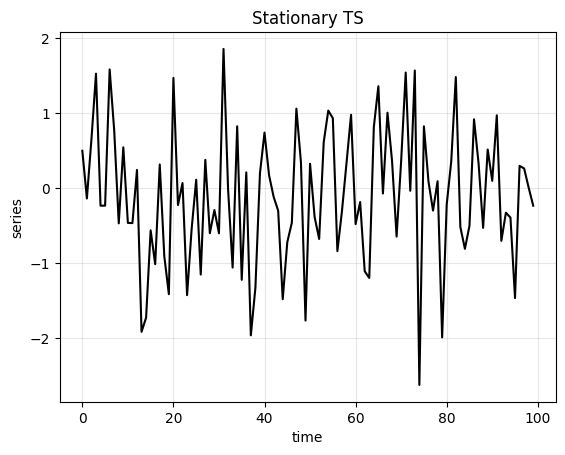

In [5]:
run_sequence_plot(time, stationary,
                  title="Stationary TS")

Notice in the plot above how there's no clear trend or seasonality. This time series data appears to be meet the four conditions of stationarity: constant mean, constant variance, constant autocorrelation, and no periodic component.

Let's look at one more example, a concrete example of data with a lag of one that has constant autocorrelation.

### Autocorrelation Structure

In [6]:
# seed to start series
seed = 3.14

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]


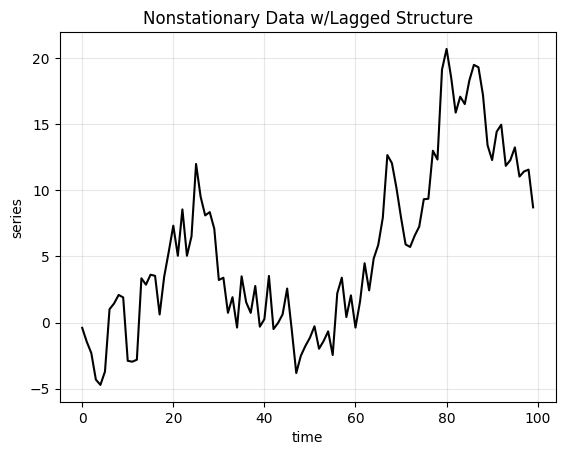

In [7]:
run_sequence_plot(time, lagged,
                  title="Nonstationary Data w/Lagged Structure")

Notice how the current value is highly correlated with the past value?

At this point you're probably wondering how to check if a time series in fact meets the four conditions of stationarity. We'll learn in Section #2 how to check that. However, starting your analysis with a run-sequence plot is an effective way to get a handle on whether your data has the appearance of being stationary.

To drive that point home, let's discuss some ways to generate nonstationary time series:
1. **Trend** (changing mean)
2. **Heteroscedasticity** (changing variance)
3. **Seasonality** (periodic component)
4. **Trend + Seasonality**

Naturally, we'll plot the results of each so we can compare nonstationary to stationary data.

# Trend

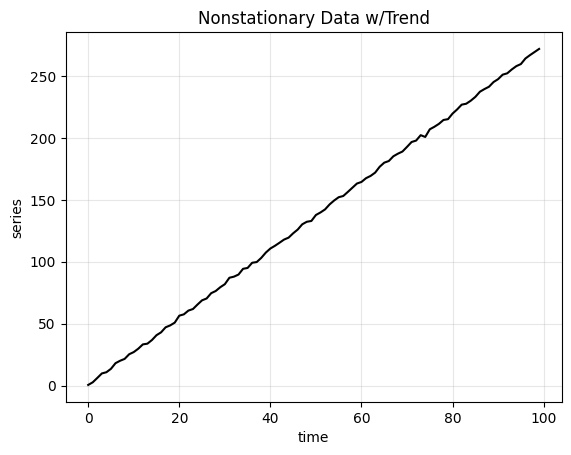

In [15]:
trend = (time * 2.75) + stationary
# plot
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")

# Heteroscedasticity

In [10]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size= 50) # make is normal - close to best fit line
level_2 = np.random.normal(loc=0, scale=10, size=50) # spreading over best fit line as the value goes up

heteroscedasticity = np.append(level_1, level_2)  # leve1 close to best fit line, level 2 spreading

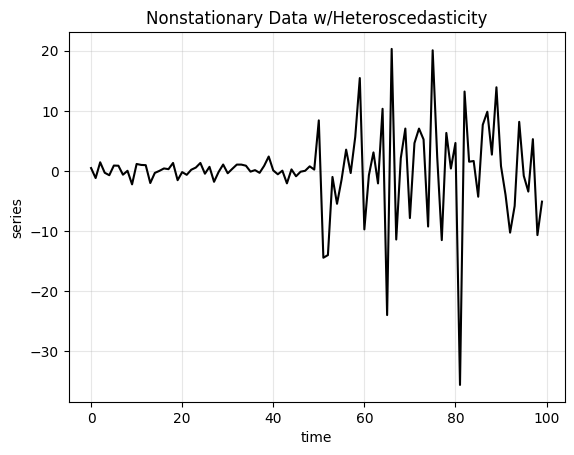

In [11]:
run_sequence_plot (time, heteroscedasticity, title= 'Nonstationary Data w/Heteroscedasticity' )

# Seasonality

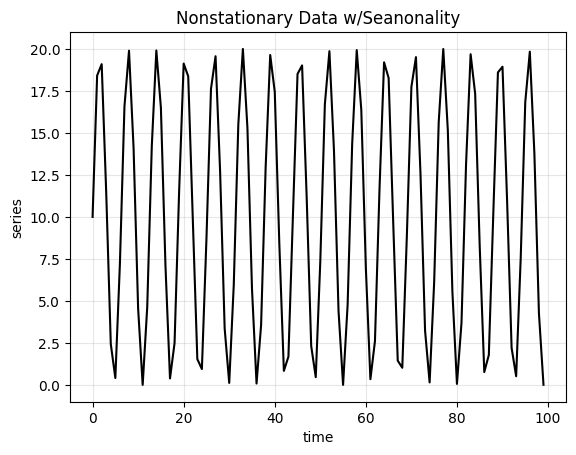

In [17]:
seasonality = 10 + np.sin(time) * 10  # sin function used for seasonality component
run_sequence_plot (time, seasonality, title= 'Nonstationary Data w/Seanonality' )

# Trend + Seasonality

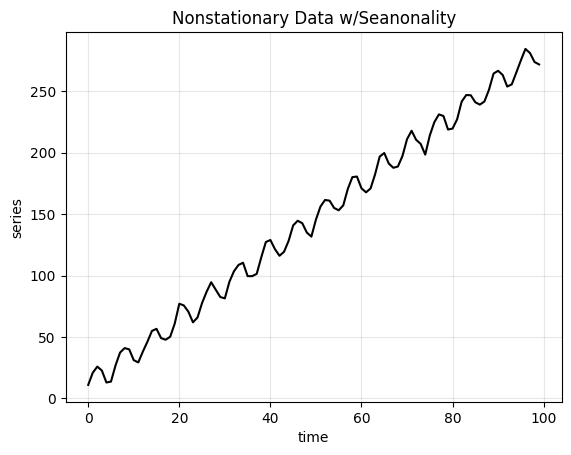

In [18]:
trend_seosonality  = trend + seasonality + stationary
run_sequence_plot (time, trend_seosonality, title= 'Nonstationary Data w/Seanonality' )

**Question:** Why is this data not stationary?

**Answer:** The mean changes over time AND there is a periodic component.